In [22]:
#importuje biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
#otwieram pliki
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [24]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [25]:
#sprawdzam rozmiar plikow
train.shape

(8693, 14)

In [26]:
test.shape

(4277, 13)

In [27]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [28]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [29]:
#brakujące wartosci
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [30]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<Axes: >

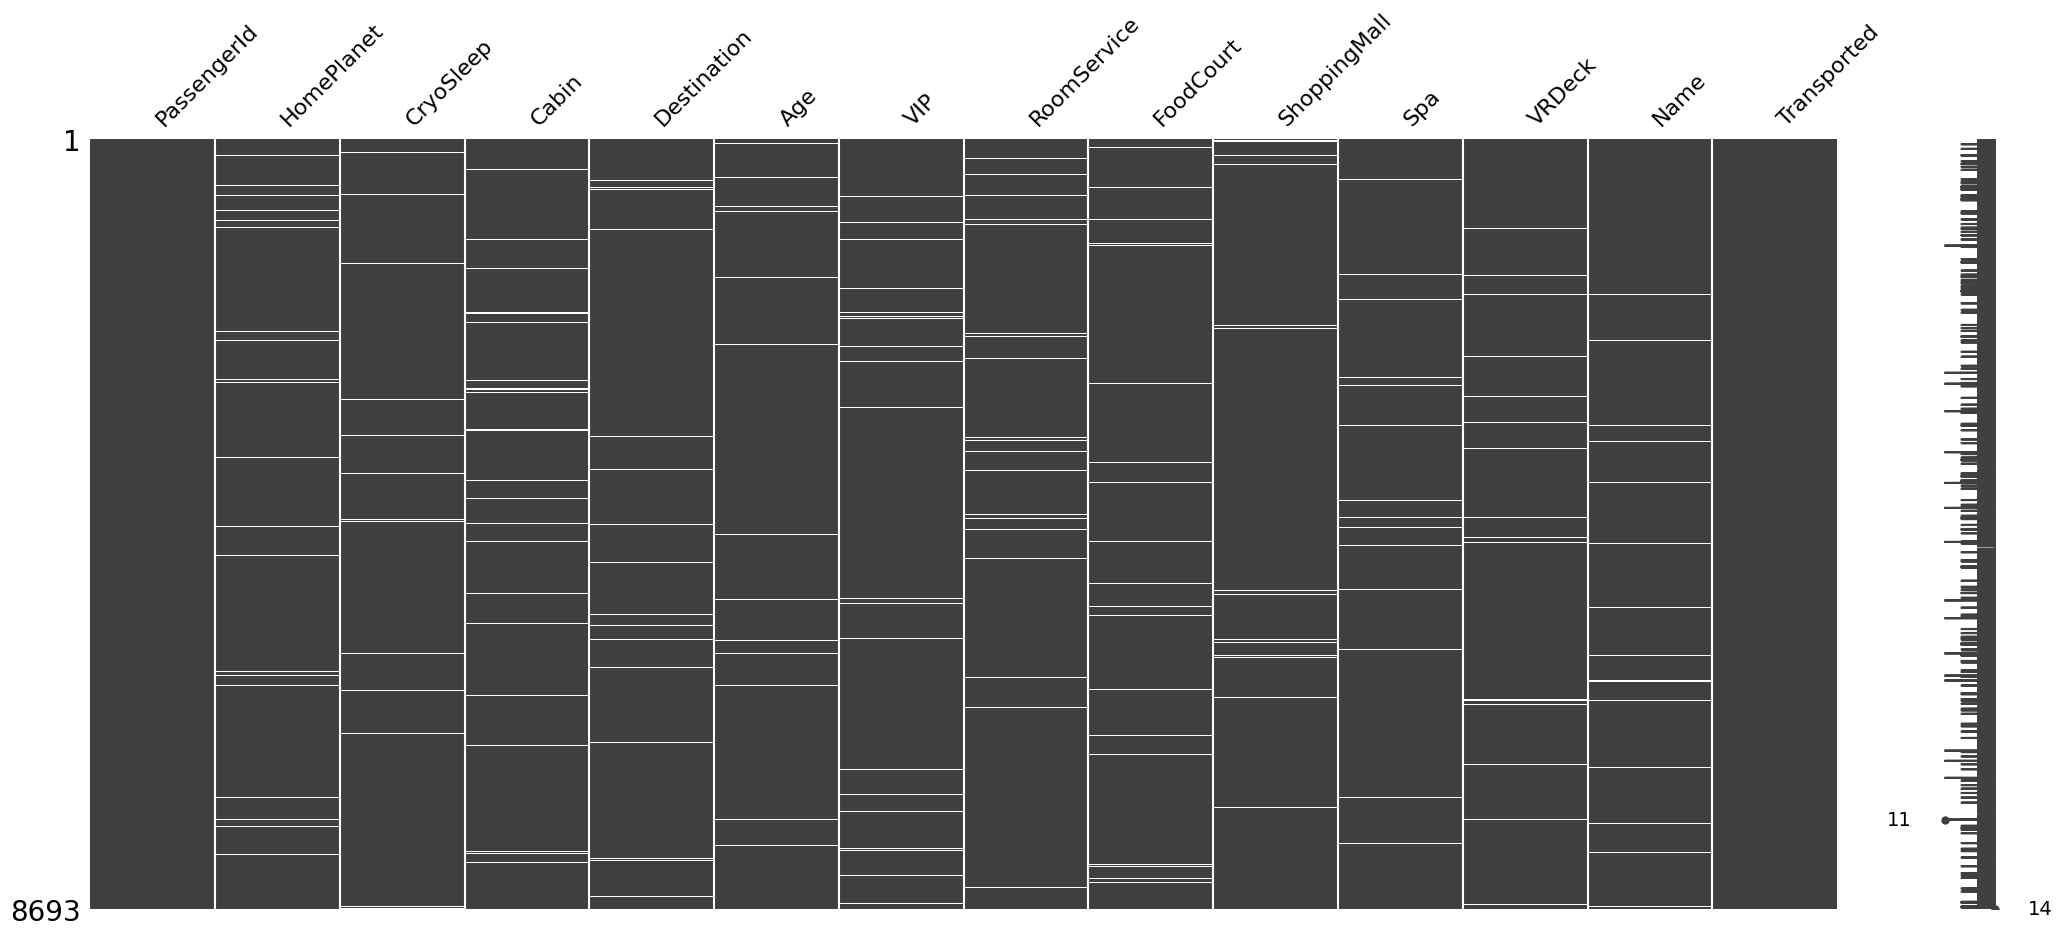

In [31]:
import missingno as msno
msno.matrix(train)

<Axes: >

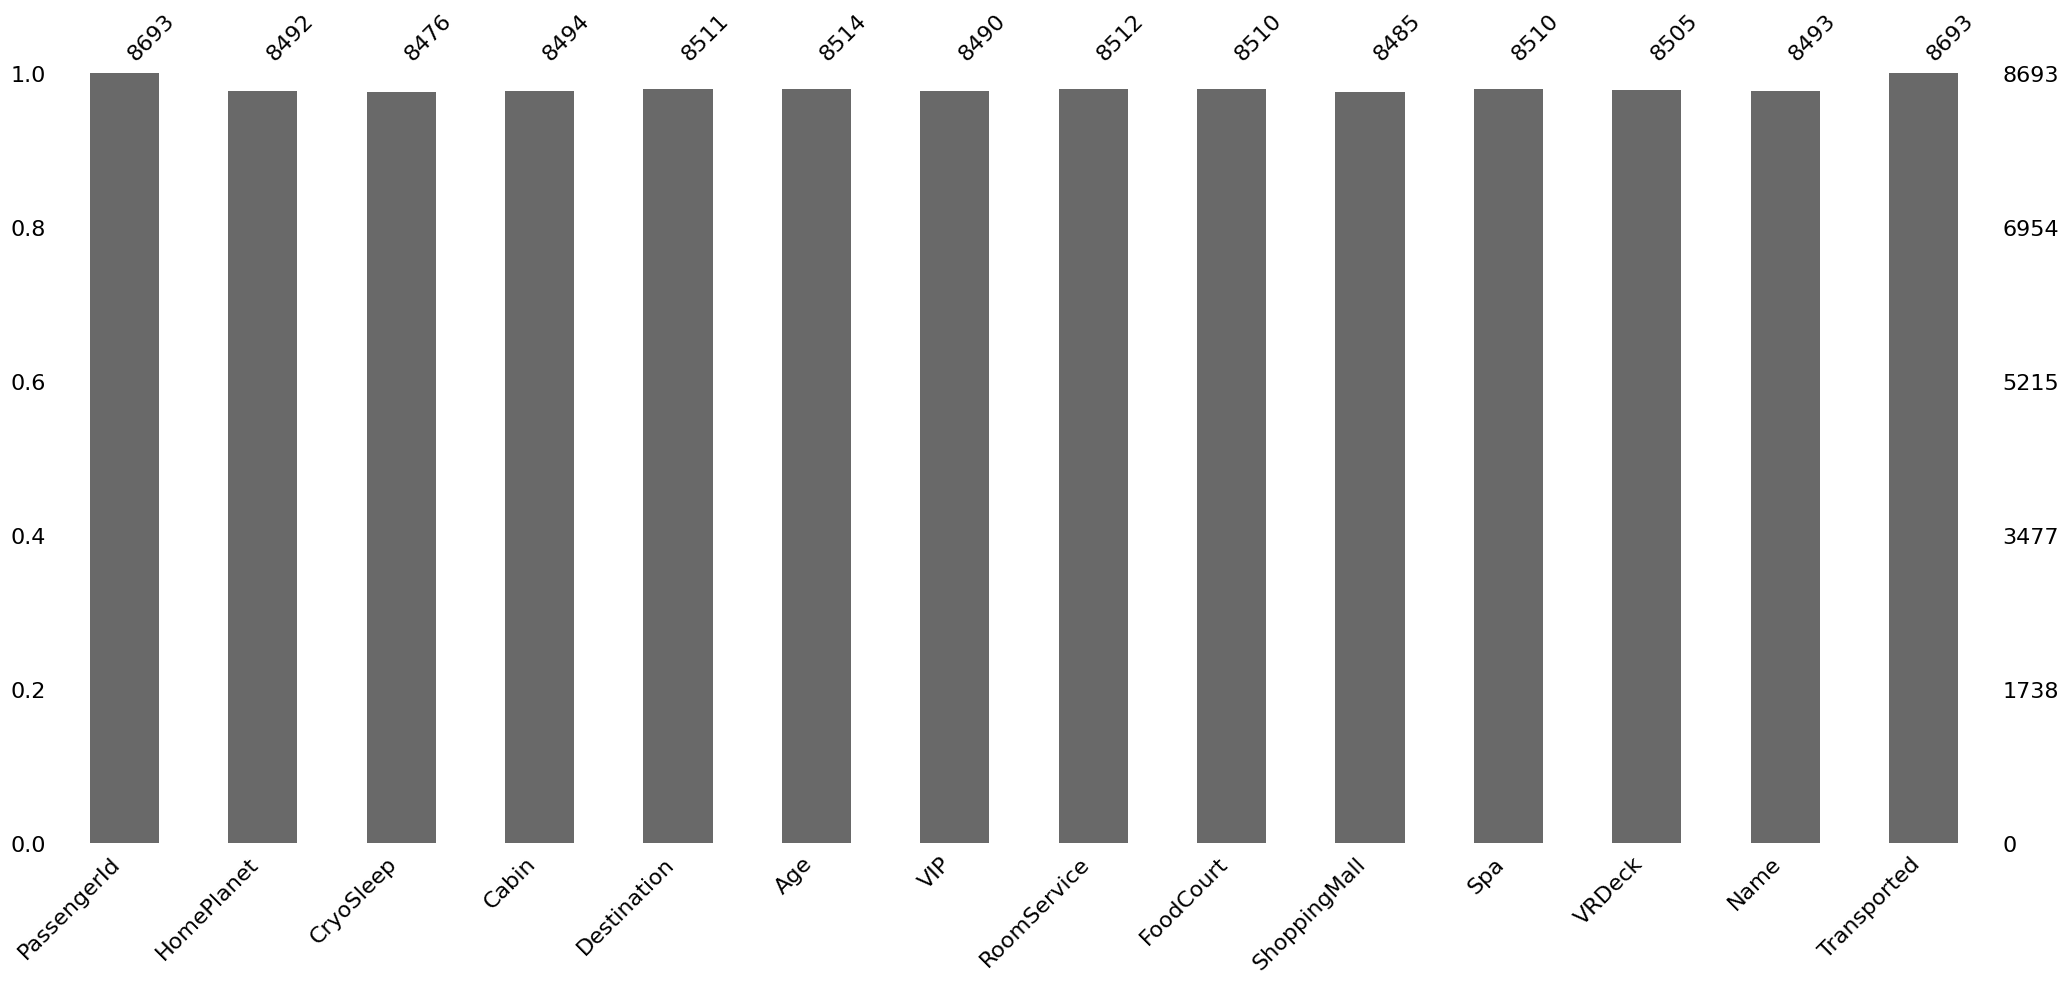

In [32]:
msno.bar(train)

In [33]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [34]:
#uzupelnienie brakujacych wartosci
train['Age']=train['Age'].fillna(train['Age'].median())
test['Age']=test['Age'].fillna(test['Age'].median())

In [35]:
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]=train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]=test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [36]:
train['Cabin']=train['Cabin'].fillna('T/0/P')
test['Cabin']=test['Cabin'].fillna('T/0/P')

In [37]:
train['VIP']=train['VIP'].fillna(False)
test['VIP']=test['VIP'].fillna(False)

In [38]:
train['CryoSleep']=train['CryoSleep'].fillna(False)
test['CryoSleep']=test['CryoSleep'].fillna(False)

In [39]:
train['HomePlanet']=train['HomePlanet'].fillna('Mars')
test['HomePlanet']=test['HomePlanet'].fillna('Mars')

In [40]:
train['Destination']=train['Destination'].fillna('PSO J318.5-22')
test['Destination']=test['Destination'].fillna('PSO J318.5-22')